In [18]:
from src.functions import *

In [19]:
phase_diagrams = {}
g = {}
g_avg = {}
g_std = {}

for n in [2,3,4, 5]:
    phase_diagrams[n] = load_from_json(f'data/binder_cumulant_n{n}_T0_1000.json')
    g[n] = phase_diagrams[n]['g']
    g_avg[n] = phase_diagrams[n]['g_avg']
    g_std[n] = phase_diagrams[n]['g_std']

gamma_range = phase_diagrams[4]['gamma_range']
T = phase_diagrams[4]['T']
num_random_models = phase_diagrams[4]['num_random_models']

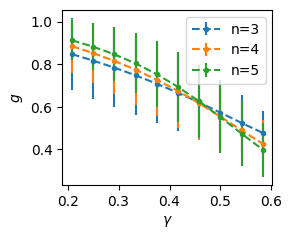

In [23]:
fig = plt.figure(figsize=(figure_size_x/2, figure_size_y/1.5))

left_lim = 5
right_lim = 15

for n in [3,4,5]:
    plt.errorbar(gamma_range[left_lim:right_lim], 
             g_avg[n][left_lim:right_lim], 
             yerr=g_std[n][left_lim:right_lim],
             fmt='.--', 
             label=f'n={n}')

plt.xlabel('$\gamma$')
plt.ylabel('$g$')
plt.legend()

plt.tight_layout()
plt.show()
fig.savefig(local_path+f'figures/binder_cumulant')